In [1]:
import os
import sys
sys.path.insert(0, os.getcwd())

import pandas as pd
import numpy as np

from dlc_analysis import glob_files, YMazeAnalysis


In [2]:
labels_ = ["WT", "Cont", "CQA"]
group_order = ["WT", "Cont", "CQA"]
color_vals = ["grey", "#00b48C", "#440154" ]

In [3]:
HOMEDIR = "YMAZE"
files_dict = glob_files(HOMEDIR)

csv_list = files_dict.get(".csv")
pkl_list = files_dict.get(".pickle")
video_list = files_dict.get(".avi")

## Define

# Run

Processed data on 00229_DLC_resnet50_Ymaze_project-DLC-2020-10-13Oct13shuffle1_140000!
Compressed pickle was saved at YMAZE/00229_analysis.pkl.gz.
Processed data on 00230_DLC_resnet50_Ymaze_project-DLC-2020-10-13Oct13shuffle1_140000!
Compressed pickle was saved at YMAZE/00230_analysis.pkl.gz.
All analyses are completed!
Have a fun with summarizing the data


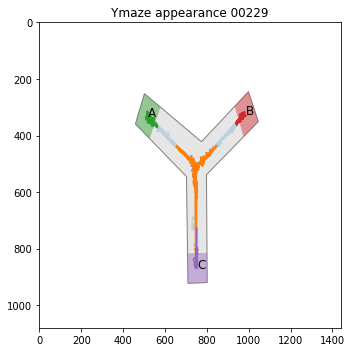

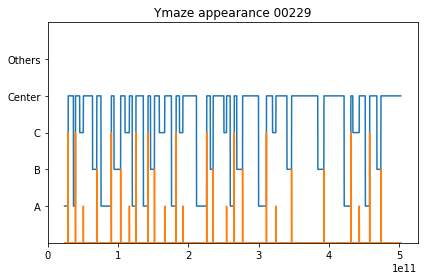

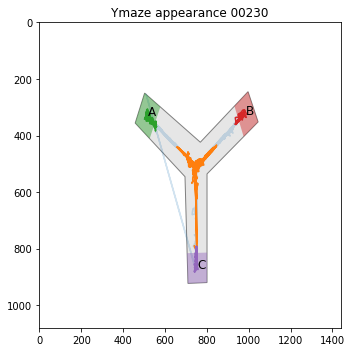

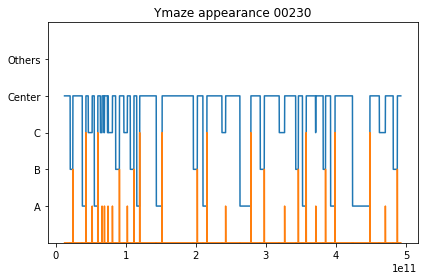

In [7]:
ymaze_datas = []
for csv, pkl in zip(csv_list, pkl_list):
    print(f"Processed data on {csv.stem}!")
    ymaze = YMazeAnalysis(csv, pkl)
    ymaze.analyze()
    ymaze.to_pickle()
    ymaze.plot_ymaze()
    ymaze.plot_alternations()
    ymaze_datas.append(ymaze)

print("All analyses are completed!")
print("Have a fun with summarizing the data")

# Summarize 

In [8]:
data = pd.concat([n.summary_df for n in ymaze_datas], axis = 0)
data


,filename,video_shape,video_fps,arm_entries,spontaneous_alternation,total_distance,mean_speed
0,00229_DLC_resnet50_Ymaze_project-DLC-2020-10-1...,"(1440, 1080)",10.0,41,30,1920.406661,4.000847
0,00230_DLC_resnet50_Ymaze_project-DLC-2020-10-1...,"(1440, 1080)",10.0,27,12,1896.255343,3.950532


## Labeling data

In [159]:
label_p = Path(r"D:\Behavior\Exp1\Exp1.R2\Data\Exp1.R2_02_Ymaze")
label_csv = [i for i in list(label_p.glob("*.csv")) if "label" in str(i)]
label_data = pd.read_csv(label_csv[0])
label_data["File"] = label_data["File"].astype(str)
label_data["File"] = "00" + label_data["File"]
label_data = label_data.rename(columns={'File': 'filename'})

In [160]:
label_data

,filename,ID,group,EarID,sp_alt,alt_rate,entry count
0,00228,67,Y,1,20,64.516129,33
1,00229,69,Y,3,17,60.714286,30
2,00230,74,Y,8,14,51.851852,29
3,00231,88,Y,22,22,59.459459,39
4,00232,68,WT,2,15,55.555556,29
5,00233,70,WT,4,17,77.272727,24
6,00234,71,WT,5,15,51.724138,31
7,00235,72,WT,6,21,63.636364,35
8,00236,75,X,9,14,60.869565,25
9,00237,77,X,11,11,52.380952,23


# Merge two dataframes

In [161]:
dF = pd.merge(label_data, data, on = "filename")

In [162]:
dF1 = dF.copy()

##  Change group label

In [163]:
group_blind =["X", "Y", "WT"]
group_name = ["CQA", "Cont", "WT"]  # Exp1 Round 2 keys

for b, n in zip(group_blind, group_name):
    dF1.loc[dF1["group"] == b, "group"] = f"{n}"
    
dF1

,filename,ID,group,EarID,sp_alt,alt_rate,entry count,Fps,Video_shape,Arm_entries,Spontaneous_alternation,Alternation_ratio,Total_dstance,Mean_speed
0,00228,67,Cont,1,20,64.516129,33,10.0,"[1440, 1080]",23,13,61.905,1453.828698,3.157751
1,00229,69,Cont,3,17,60.714286,30,10.0,"[1440, 1080]",26,14,58.333,1645.023309,3.572255
2,00230,74,Cont,8,14,51.851852,29,10.0,"[1440, 1080]",23,8,38.095,1659.324655,3.613512
3,00231,88,Cont,22,22,59.459459,39,10.0,"[1440, 1080]",38,22,61.111,2153.016037,4.687603
4,00232,68,WT,2,15,55.555556,29,10.0,"[1440, 1080]",27,16,64.000,1693.673653,3.673912
5,00233,70,WT,4,17,77.272727,24,10.0,"[1440, 1080]",23,13,61.905,1373.293678,3.086053
6,00234,71,WT,5,15,51.724138,31,10.0,"[1440, 1080]",29,15,55.556,1854.582515,3.990066
7,00235,72,WT,6,21,63.636364,35,10.0,"[1440, 1080]",32,20,66.667,1989.779984,4.282781
8,00236,75,CQA,9,14,60.869565,25,10.0,"[1440, 1080]",22,11,55.000,1463.042602,3.183295
9,00237,77,CQA,11,11,52.380952,23,10.0,"[1440, 1080]",22,11,55.000,1341.167723,2.895440


## Add xticks

In [164]:
group_dic = {"WT": 1, "Cont":2, "CQA":3}  
def add_scatter(d):
    d["group"] = pd.Categorical(d['group'], categories=group_dic.keys(), ordered=True)  # Sort by order in group_dic
    for k,v in group_dic.items():
        d.loc[d["group"] == k, "group_scatter"] = np.int(v) -0.15
        d["group_boxplot"] = d["group_scatter"] + 0.30
    jitter_sc = np.random.normal(loc = 0, scale = .03, size = d["group_scatter"].to_numpy().shape)   # To make jitter plot. manually adding normal random values in a range of scale 0.05
    jitter_box = np.random.normal(loc = 0, scale = .02, size = d["group_boxplot"].to_numpy().shape) 

    d["group_scatter"] += jitter_sc  # jitter taste
    return d

In [165]:
d = add_scatter(dF1)


# Export the result

In [166]:
time

8

In [167]:
outputpath = Path(r"D:\Behavior\Exp1\Exp1.R2\Outputs\Exp1_Round2_Ymaze")
savecsvdir = outputpath /"output"/"csv"/"{}min".format(time)
if not os.path.isdir(savecsvdir):
    os.makedirs(savecsvdir)

In [168]:
dF1.to_csv(savecsvdir/"Exp1_Round1_Ymaze_DLC_{}min.csv".format(time))
dF1.groupby(["group"]).mean().to_csv(savecsvdir/"Exp1_Round1_Ymaze_DLC_groupby_mean_{}min.csv".format(time))

In [150]:
#dF1 = pd.read_csv(r"D:\Behavior\Exp1\Exp1.R2\Outputs\Exp1_Round2_Ymaze\output\csv\7min\Exp1_Round1_Ymaze_DLC_7min.csv")

# Plot 

In [169]:
theme_ = theme(axis_text_x=element_text(size = 16, angle = 45),
               axis_text_y = element_text(size = 16),
              axis_title=element_text(size = 16))

In [170]:
outputpath = Path(r"D:\Behavior\Exp1\Exp1.R2\Outputs\Exp1_Round2_Ymaze")
savefigdir =  outputpath /"output"/"Figure"/"{}min".format(time)
if not os.path.isdir(savefigdir ):
    os.makedirs(savefigdir)

C:\Users\iiiss\Anaconda3\envs\blood\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iiiss\Anaconda3\envs\blood\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: D:\Behavior\Exp1\Exp1.R2\Outputs\Exp1_Round2_Ymaze\output\Figure\8min\Exp1_Round2_Ymaze_AlternationRatio_8min.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


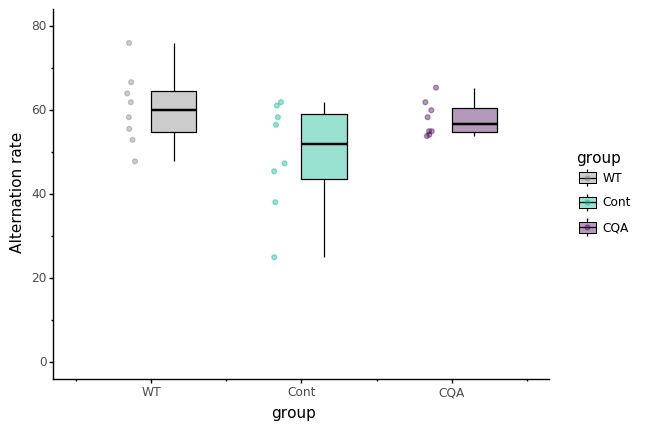

<ggplot: (-9223371846056254244)>

In [171]:
yvar = "Alternation_ratio"

fig1 = (
    ggplot(d) 
    + geom_boxplot(aes(x = "group_boxplot" , y = yvar, fill = "group"), color = "black", width = .3,  outlier_alpha = 0, alpha = .4 )
    + geom_point(aes(x='group_scatter', y = yvar, color = "group"), alpha = .4) 
    
    #+ stat_summary(aes(x = 'Stage_boxplot' , y = 'velocity', color = "Stage"), geom = "errorbar", fun_data = "mean_cl_normal", size =.4, width = .2)
    #+ stat_summary(aes(x = 'Stage_boxplot' , y = 'velocity', color = "Stage"), data = df_grouped_stage_, geom = "point", size =3)
    + theme_classic()
    + scale_x_continuous(breaks=(1, 2, 3), labels = list(group_dic.keys()) , name = "group"  , limits = (0.5,3.5))
    + ylab("Alternation rate")
    + ylim(0, 80)
    + scale_color_manual(values = color_vals)
    + scale_fill_manual(values = color_vals)
    #+ ggtitle('Figure 1: repeated measures individual datapoints')
)
fig1.save(savefigdir/"Exp1_Round2_Ymaze_AlternationRatio_{}min.png".format(time))
fig1

C:\Users\iiiss\Anaconda3\envs\blood\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iiiss\Anaconda3\envs\blood\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: D:\Behavior\Exp1\Exp1.R2\Outputs\Exp1_Round2_Ymaze\Exp1_Round2_Ymaze_meanspeed.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


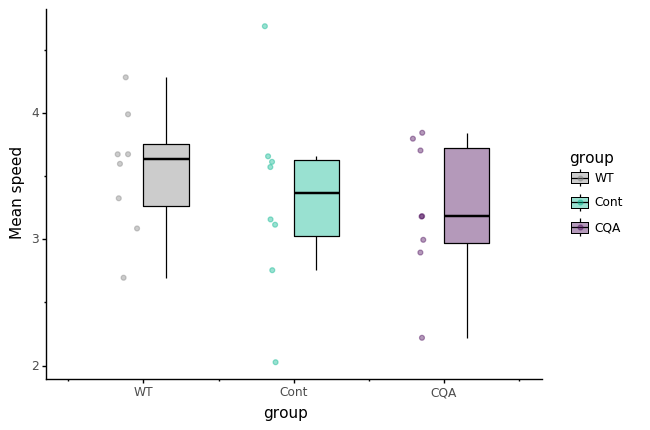

<ggplot: (-9223371917658906372)>

In [9]:
yvar = "Mean_speed"

fig2 = (
    ggplot(d) 
    + geom_boxplot(aes(x = "group_boxplot" , y = yvar, fill = "group"), color = "black",  width = .3,  outlier_alpha = 0, alpha = .4 )
    + geom_point(aes(x='group_scatter', y = yvar, color = "group"), alpha = .4) 
    
    #+ stat_summary(aes(x = 'Stage_boxplot' , y = 'velocity', color = "Stage"), geom = "errorbar", fun_data = "mean_cl_normal", size =.4, width = .2)
    #+ stat_summary(aes(x = 'Stage_boxplot' , y = 'velocity', color = "Stage"), data = df_grouped_stage_, geom = "point", size =3)
    + theme_classic()
    + scale_x_continuous(breaks=(1, 2, 3), labels = list(group_dic.keys()) , name = "group"  , limits = (0.5,3.5))
    + ylab("Mean speed")
    #+ ylim(0, 0.25)
    + scale_color_manual(values = color_vals)
    + scale_fill_manual(values = color_vals)
    #+ ggtitle('Figure 1: repeated measures individual datapoints')
)
fig2.save(r"D:\Behavior\Exp1\Exp1.R2\Outputs\Exp1_Round2_Ymaze\Exp1_Round2_Ymaze_meanspeed.png")
fig2

C:\Users\iiiss\Anaconda3\envs\blood\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iiiss\Anaconda3\envs\blood\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: D:\Behavior\Exp1\Exp1.R2\Outputs\Exp1_Round2_Ymaze\output\Figure\8min\Exp1_Round2_Ymaze_ArmEntries_8.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


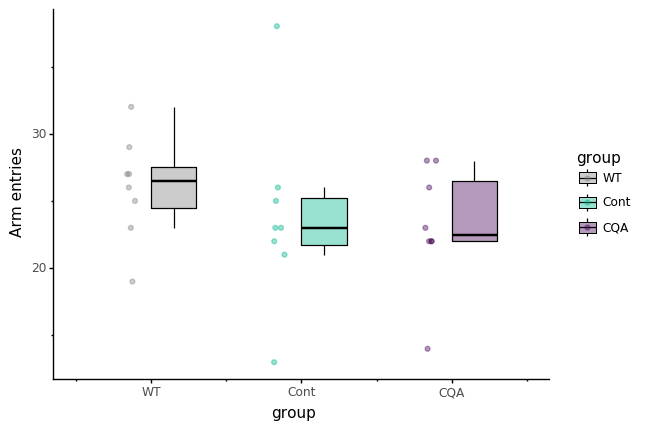

<ggplot: (-9223371846057112344)>

In [172]:
yvar = "Arm_entries"

fig3 = (
    ggplot(d) 
    + geom_boxplot(aes(x = "group_boxplot" , y = yvar, fill = "group"), color = "black",  width = .3,  outlier_alpha = 0, alpha = .4 )
    + geom_point(aes(x='group_scatter', y = yvar, color = "group"), alpha = .4) 
    
    #+ stat_summary(aes(x = 'Stage_boxplot' , y = 'velocity', color = "Stage"), geom = "errorbar", fun_data = "mean_cl_normal", size =.4, width = .2)
    #+ stat_summary(aes(x = 'Stage_boxplot' , y = 'velocity', color = "Stage"), data = df_grouped_stage_, geom = "point", size =3)
    + theme_classic()
    + scale_x_continuous(breaks=(1, 2, 3), labels = list(group_dic.keys()) , name = "group"  , limits = (0.5,3.5))
    + ylab("Arm entries")
    #+ ylim(0, 0.25)
    + scale_color_manual(values = color_vals)
    + scale_fill_manual(values = color_vals)
    #+ ggtitle('Figure 1: repeated measures individual datapoints')
)
fig3.save(savefigdir/"Exp1_Round2_Ymaze_ArmEntries_{}.png".format(time))
fig3

# Bodyweight

In [11]:
bw23 = pd.read_csv(r"D:\Behavior\Exp1\Exp1.R2\Data\Exp1_round2_bodyweight_label.csv")

In [13]:
bw23 = add_scatter(bw23)

In [14]:
bw23

,Round,ID,EarID,group_blind,group,bw_at23w,group_scatter,group_boxplot
0,2,68,2,WT,WT,34.1,0.899050,1.15
1,2,70,4,WT,WT,41.4,0.844624,1.15
2,2,71,5,WT,WT,35.9,0.844018,1.15
3,2,72,6,WT,WT,36.2,0.871859,1.15
4,2,73,7,WT,WT,38.2,0.835984,1.15
5,2,80,14,WT,WT,38.0,0.800770,1.15
6,2,82,16,WT,WT,41.0,0.788854,1.15
7,2,86,20,WT,WT,43.9,0.870018,1.15
8,2,75,9,X,CQA,34.3,2.876018,3.15
9,2,77,11,X,CQA,38.4,2.880950,3.15


C:\Users\iiiss\Anaconda3\envs\blood\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\iiiss\Anaconda3\envs\blood\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: D:\Behavior\Exp1\Exp1.R2\Outputs\Exp1_Round2_bodyweight_23.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


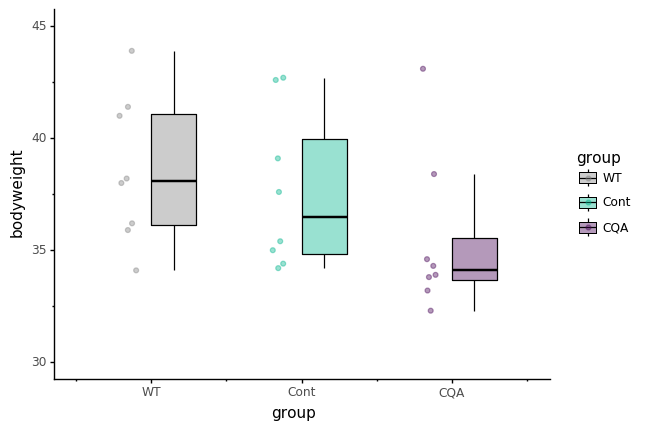

<ggplot: (-9223371917657921584)>

In [18]:

fig4 = (
    ggplot(bw23) 
    + geom_boxplot(aes(x = "group_boxplot" , y = "bw_at23w", fill = "group"), color = "black",  width = .3,  outlier_alpha = 0, alpha = .4 )
    + geom_point(aes(x='group_scatter', y = "bw_at23w", color = "group"), alpha = .4) 
    
    #+ stat_summary(aes(x = 'Stage_boxplot' , y = 'velocity', color = "Stage"), geom = "errorbar", fun_data = "mean_cl_normal", size =.4, width = .2)
    #+ stat_summary(aes(x = 'Stage_boxplot' , y = 'velocity', color = "Stage"), data = df_grouped_stage_, geom = "point", size =3)
    + theme_classic()
    + scale_x_continuous(breaks=(1, 2, 3), labels = list(group_dic.keys()) , name = "group"  , limits = (0.5,3.5))
    + ylab("bodyweight")
    + ylim(30, 45)
    + scale_color_manual(values = color_vals)
    + scale_fill_manual(values = color_vals)
    #+ ggtitle('Figure 1: repeated measures individual datapoints')
)
fig4.save(r"D:\Behavior\Exp1\Exp1.R2\Outputs\Exp1_Round2_bodyweight_23.png")
fig4

In [1]:
import pingouin as pg

In [28]:
pg.ttest(d[d.group == "Cont"].Alternation_ratio, d[d.group == "CQA"].Alternation_ratio, )

NameError: name 'pg' is not defined